# Lab 5.3: Two Sample Hypothesis Testing

**Question 1**

 Many doctors believe that early prenatal care is very important to the health of a baby and its mother. Efforts have recently been focused on teen mothers. A random sample of 52 teenagers who gave birth revealed that 32 of them began prenatal care in the first trimester of their pregnancy. A random sample of 209 women in their twenties who gave birth revealed that 163 of them began prenatal care in the first trimester of their pregnancy.  
 
1) Construct a 95% confidence interval for the difference between the proportion of teen mothers who get early prenatal care and the proportion of mothers in their twenties who get early prenatal care.  


2) Briefly interpret the confidence interval. 

$$ (\hat{p}_1 - \hat{p}_2) \pm 1.96 \sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}} $$

In [1]:
import numpy as np
n_teen = 52
p_teen = 32/52
n_twenties = 209
p_twenties = 163/209
s_total = np.sqrt((p_teen*(1-p_teen)/n_teen)+(p_twenties*(1-p_twenties)/n_twenties))
print('95% confidence interval:', '(',np.abs(p_teen - p_twenties)- 1.96*s_total,',',np.abs(p_teen - p_twenties) + 1.96*s_total,')')

95% confidence interval: ( 0.0208506166025 , 0.308188765068 )


#### Answer 2.1

This 95% CI tells us that there is quite a big difference between the proportion of teen women who receive pre-natal care and 20 year old women who receive pre-natal care. For a randomly selected sample, 95% of the results will range between 2% and 30% difference between the two age groups. If we were running a hypothesis test to see if teens and 20 year olds received the same amount of care, we would likely reject that claim based on this CI.

** the difference in percentage of mothers giving birth being in twenties or being teenager falls in 2% to 31% at a 95% confidence interval. In other words 95 out of 100 times a mother in twenties with prenatal care will give birth with 2% upto 30% chance more or less than the same mother in teen age. **

**Question 2**  

A math instructor wrote two versions of the same test that he believed to be of equal difficulty. He gave the first version (A) to 36 students and the second version (B) to 41 students. We will consider the two groups to be random samples from the population of all community college statistics students. The 36 students who took version A had a mean score of 79.3 with a standard deviation of 11.26. The 41 students who took version B had a mean score of 84.1 with a standard deviation of 9.40.  

1) Construct a 95% confidence interval for the difference between the mean score of version A and the mean score of version B.  


2) Interpret the confidence interval in context. 

$$ \bar{X} - \bar{Y} \pm 1.96 \sqrt{\frac{s_X^2}{n_1} + \frac{s_Y^2}{n_2}} $$  

In [21]:
import scipy.stats as stats

In [22]:
stats.t.interval(.95, df=36, loc=84.1 - 79.3, scale=np.sqrt(9.4**2/41 + 11.26**2/36))

(-0.032229108991819189, 9.6322291089918135)

** 95 out of 100 times, the mean difference between students scores in version B test and version A test is between -0.03 and 9.6 . Based on these results, we would likely conclude that results of the two tests are significantly different from eachother. **

**Question 3**  

A group of 18 concertgoers was selected at random. Before the concert they were given a hearing test, and then were given another one after the concert. (The volume varied during the test, and the person also had to state which ear the sound was in.) The number of correctly identified sounds out of 10, both before and after the concert, can be found in the `before` and `after` tables in RDS (hint: join `USING (goer_id);`).  

1) Construct a 95% confidence interval for the mean of the differences between the scores before the concert and the scores after the concert.  


2) At the 0.05 level of significance, test whether a person’s hearing is adversely affected by the noise of a concert. 

In [4]:
import yaml
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

In [5]:
import pandas as pd

In [6]:
diff=pd.read_sql("SELECT before.hearing AS before_hearing ,after.hearing AS after_hearing FROM before JOIN after USING (goer_id)",engine)

In [7]:
bf_mean = diff['before_hearing'].mean()
bf_std = diff['before_hearing'].std()
aft_mean = diff['after_hearing'].mean()
aft_std = diff['after_hearing'].std()
s_diff = np.sqrt(bf_std**2/18 + aft_std**2/18)
print('95% confidence interval:')
print('(',np.abs(bf_mean - aft_mean)-1.96*s_diff,',',np.abs(bf_mean - aft_mean) + 1.96*s_diff,')')

95% confidence interval:
( 0.498006371524 , 1.94643807292 )


** $H_o$: mean of score before concert = mean of score after concert **

** $H_a$: mean of score before concert $\neq$ mean of score after concert **

In [21]:
t_statistics = (bf_mean - aft_mean)/s_diff
stats.norm(0,1).cdf(-np.abs(t_statistics))

0.000470172749014439

** Since the p-value is smaller than 0.05 significance level we reject the null hypothesis. In other word there is sufficient evidence showing that attending concerts likely has an adverse effect on hearing. **

**Question 4**

Are male high school graduates equally likely to attend college the following fall as female high school graduates? A random sample of 1354 males who graduated high school in 2007 found that 860 of them were enrolled in college in October 2007. A sample of 1415 females who graduated high school in 2007 found that 995 of them were enrolled in college in October 2007. At the 0.05 level of significance, test the null hypothesis that the proportion of male graduates that go on to college is the same as the proportion of female graduates that go on to college against the two sided alternative. Clearly state your conclusion. 

In [8]:
p_m = 860/1354
p_f = 995/1415
n_m = 1354
n_f = 1415
p = (p_m*n_m + p_f*n_f)/(n_m + n_f)
s = np.sqrt(p*(1-p)*(1/n_m+1/n_f))
t_statistic = np.abs(p_m - p_f)/s
print(t_statistic)

3.80516300883


In [15]:
# p-value
2*stats.norm(0,1).cdf(-t_statistic)

0.00014171083233362821

** since the p-value is less than 0.05 significance level we reject the null hypothesis. In other words there is not sufficient evidence that the proportion of male graduates who go on to college is the same as the female graduates (at a 95% confidence level). ** 

**Question 5**

Here we will use hypothesis testing to analyze **Click Through Rate (CTR)** on the New York Times website.
Click-through rate (CTR) is the number of users that click on a specific link out of the total users that view a page, email, or advertisement.
We are going to determine if there is statistically significant difference between the mean CTR for
the following groups:
```
1. Signed in users v.s. Not signed in users
2. Male v.s. Female
```


1) Load the `nyt` table from RDS into a pandas dataframe.

   Use `data.info()` to make sure the datatypes are valid and there are no null values.
   This data has been cleaned for you, but generally it is good practice to check for those.
   

In [10]:
data=pd.read_sql("SELECT * FROM nyt",engine)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 6 columns):
user_id        458441 non-null int64
age            458441 non-null int64
gender         458441 non-null int64
impressions    458441 non-null int64
clicks         458441 non-null int64
signed_in      458441 non-null int64
dtypes: int64(6)
memory usage: 21.0 MB


2) Make a new column `CTR` using the `Impressions` and the `Clicks` columns. (`CTR` = `Clicks` / `Impressions`)  
   Remember to remove the rows with `0` impressions.
   

In [12]:
data_nonzero = data[data.impressions != 0 ]

In [13]:
data_nonzero['CTR'] = data_nonzero['clicks']/data_nonzero['impressions']

/Users/victorvulovic/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
data_nonzero['CTR'].describe()

count    455375.000000
mean          0.018471
std           0.069034
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CTR, dtype: float64

3) Plot the distribution of each column in the dataframe. You can do this using `pandas.DataFrame.hist()`.
   Check out the arguments you can use with the function
   [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).
   Set the `figsize=(12,5)` to make sure the graph is readable.
   

In [15]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


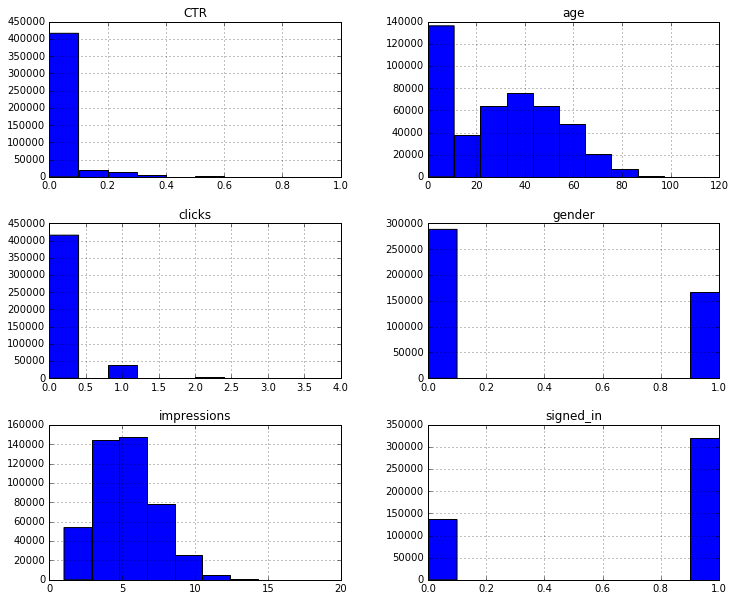

In [16]:
pd.DataFrame.hist(data_nonzero,figsize=(12,10),\
                  column=['CTR','age','clicks','gender','impressions','signed_in']);

4) Make 2 dataframes separating the rows where the users who are signed in and users who are
   not signed in.
   Plot the distributions of the columns in each of the dataframes. By visually inspecting
   the two sets of distributions, describe the differences between users who are signed in and not signed in?

In [17]:
data_signed = data_nonzero[(data_nonzero['signed_in']==1)]
data_not_signed = data_nonzero[(data_nonzero['signed_in']==0)]

Signed In:


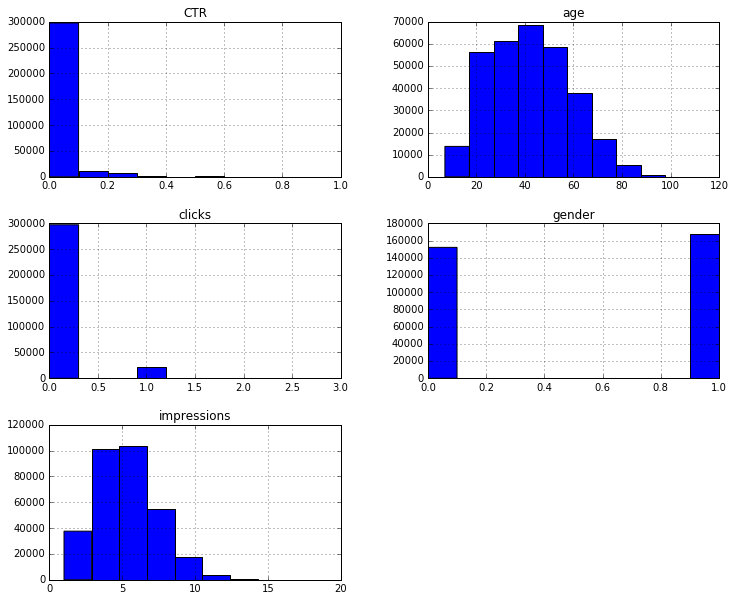

In [18]:
print('Signed In:')
pd.DataFrame.hist(data_signed,figsize=(12,10),\
                  column=['CTR','age','clicks','gender','impressions']);

Not Singed In:


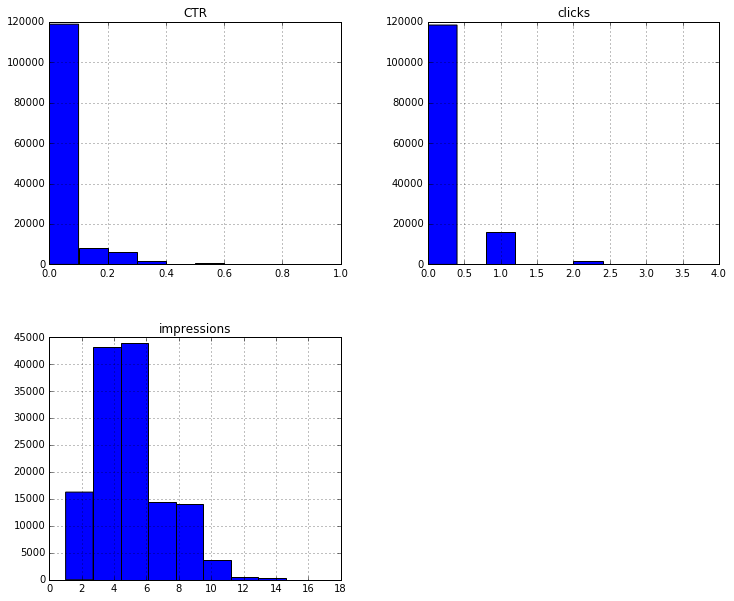

In [19]:
print('Not Singed In:')
pd.DataFrame.hist(data_not_signed,figsize=(12,10),\
                  column=['CTR','clicks','impressions']);

** CTR for signed in users is much higher than not signed in users. Also their impressions is much higher (the peak and the average). **

5) Use a Welch's t-test to determine if the mean CTR between the signed-in users
   and the non-signed-in users is statistically different. Explain how you
   arrive at your conclusion.

   The Welch's t-test assumes the two populations in which the samples are drawn from
   have different variances.

   ```python
   scipy.stats.ttest_ind(a, b, equal_var=False)
   ```

In [23]:
stats.ttest_ind(data_not_signed.CTR,data_signed.CTR, equal_var=False)

Ttest_indResult(statistic=55.376117934260868, pvalue=0.0)

#### Answer 5 Commentary

The test statistic is enormous, which shirnks the p-value to nearly 0. Assuming our null hypothesis is that CTR is the same for signed in and not-signed in users, we would most certainly reject the null. P<.05, so our result is significant to show that CTR's between the two groups are not the same at all.


6) Determine if the mean CTR between male users and female users is
   statistically different. `Male: 1, Female: 0`


** $H_o$: mean CTR for females = mean CTR for males **

** $H_a$: mean CTR for females $\neq$ mean CTR for males **

In [24]:
male_mean = data_signed[data_signed['gender'] == 1]['CTR'].mean()
female_mean = data_signed[data_signed['gender'] == 0]['CTR'].mean()
male_std = data_signed[data_signed['gender'] == 1]['CTR'].std()
female_std = data_signed[data_signed['gender'] == 0]['CTR'].std()
n_male = len(data_signed[data_signed['gender'] == 1]['CTR'])
n_female = len(data_signed[data_signed['gender'] == 0]['CTR'])
diff = np.abs(male_mean - female_mean)
std = np.sqrt(male_std**2/n_male + female_std**2/n_female)
t_statistic = diff/std
print('p-value=',2*stats.norm(0,1).cdf(-t_statistic))

p-value= 0.00100274271465


** At 95% confidence level the data demonstrates that mean CTR for males is not the same for female CTR. The null hypothesis is rejected. **

#### Hint

Some functions that may be useful to you:

- From the `numpy` package:
    - `sqrt`
    - `array`
- From the `yaml` package:
    - `load` - to load Postgres credentials
- From the `sqlalchemy` package:
    - `create_engine` - to connect to Postgres
- From the `pandas` package:
    - `read_sql`
    - `read_sql_table`
- From the `scipy` package:
    - `stats.norm.cdf`
    - `stats.sem`
    - `stats.t.interval`
    - `stats.ttest_1samp`
    - `stats.ttest_ind`